# **Exploratory Data Analysis** 

In [183]:
# Import the neccessary Libraries
import numpy as np
import pandas as pd

# for vizualise
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [184]:
# Import and Load dataset
df = pd.read_csv('Dataset/fitness_class_2212.csv')
df.head(10)

,booking_id,months_as_member,weight,days_before,day_of_week,time,category,attended
0,1,17,79.56,8,Wed,PM,Strength,0
1,2,10,79.01,2,Mon,AM,HIIT,0
2,3,16,74.53,14,Sun,AM,Strength,0
3,4,5,86.12,10,Fri,AM,Cycling,0
4,5,15,69.29,8,Thu,AM,HIIT,0
5,6,7,93.33,2,Mon,AM,Cycling,0
6,7,11,88.59,6,Wednesday,PM,HIIT,0
7,8,9,89.52,10,Fri,AM,HIIT,0
8,9,23,71.12,10,Fri.,AM,HIIT,1
9,10,7,81.25,10,Fri,AM,HIIT,0


In [185]:
# Info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   booking_id        1500 non-null   int64  
 1   months_as_member  1500 non-null   int64  
 2   weight            1480 non-null   float64
 3   days_before       1500 non-null   object 
 4   day_of_week       1500 non-null   object 
 5   time              1500 non-null   object 
 6   category          1500 non-null   object 
 7   attended          1500 non-null   int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 93.9+ KB


In [186]:
# Shape of the data
df.shape

(1500, 8)

In [187]:
# check for missing Values
df.isnull().sum()

booking_id           0
months_as_member     0
weight              20
days_before          0
day_of_week          0
time                 0
category             0
attended             0
dtype: int64

In [188]:
# Check Column
df.columns

Index(['booking_id', 'months_as_member', 'weight', 'days_before',
       'day_of_week', 'time', 'category', 'attended'],
      dtype='object')

In [189]:
# Check the data types
df.dtypes

booking_id            int64
months_as_member      int64
weight              float64
days_before          object
day_of_week          object
time                 object
category             object
attended              int64
dtype: object

In [190]:
!pip install missingno 

<Axes: >

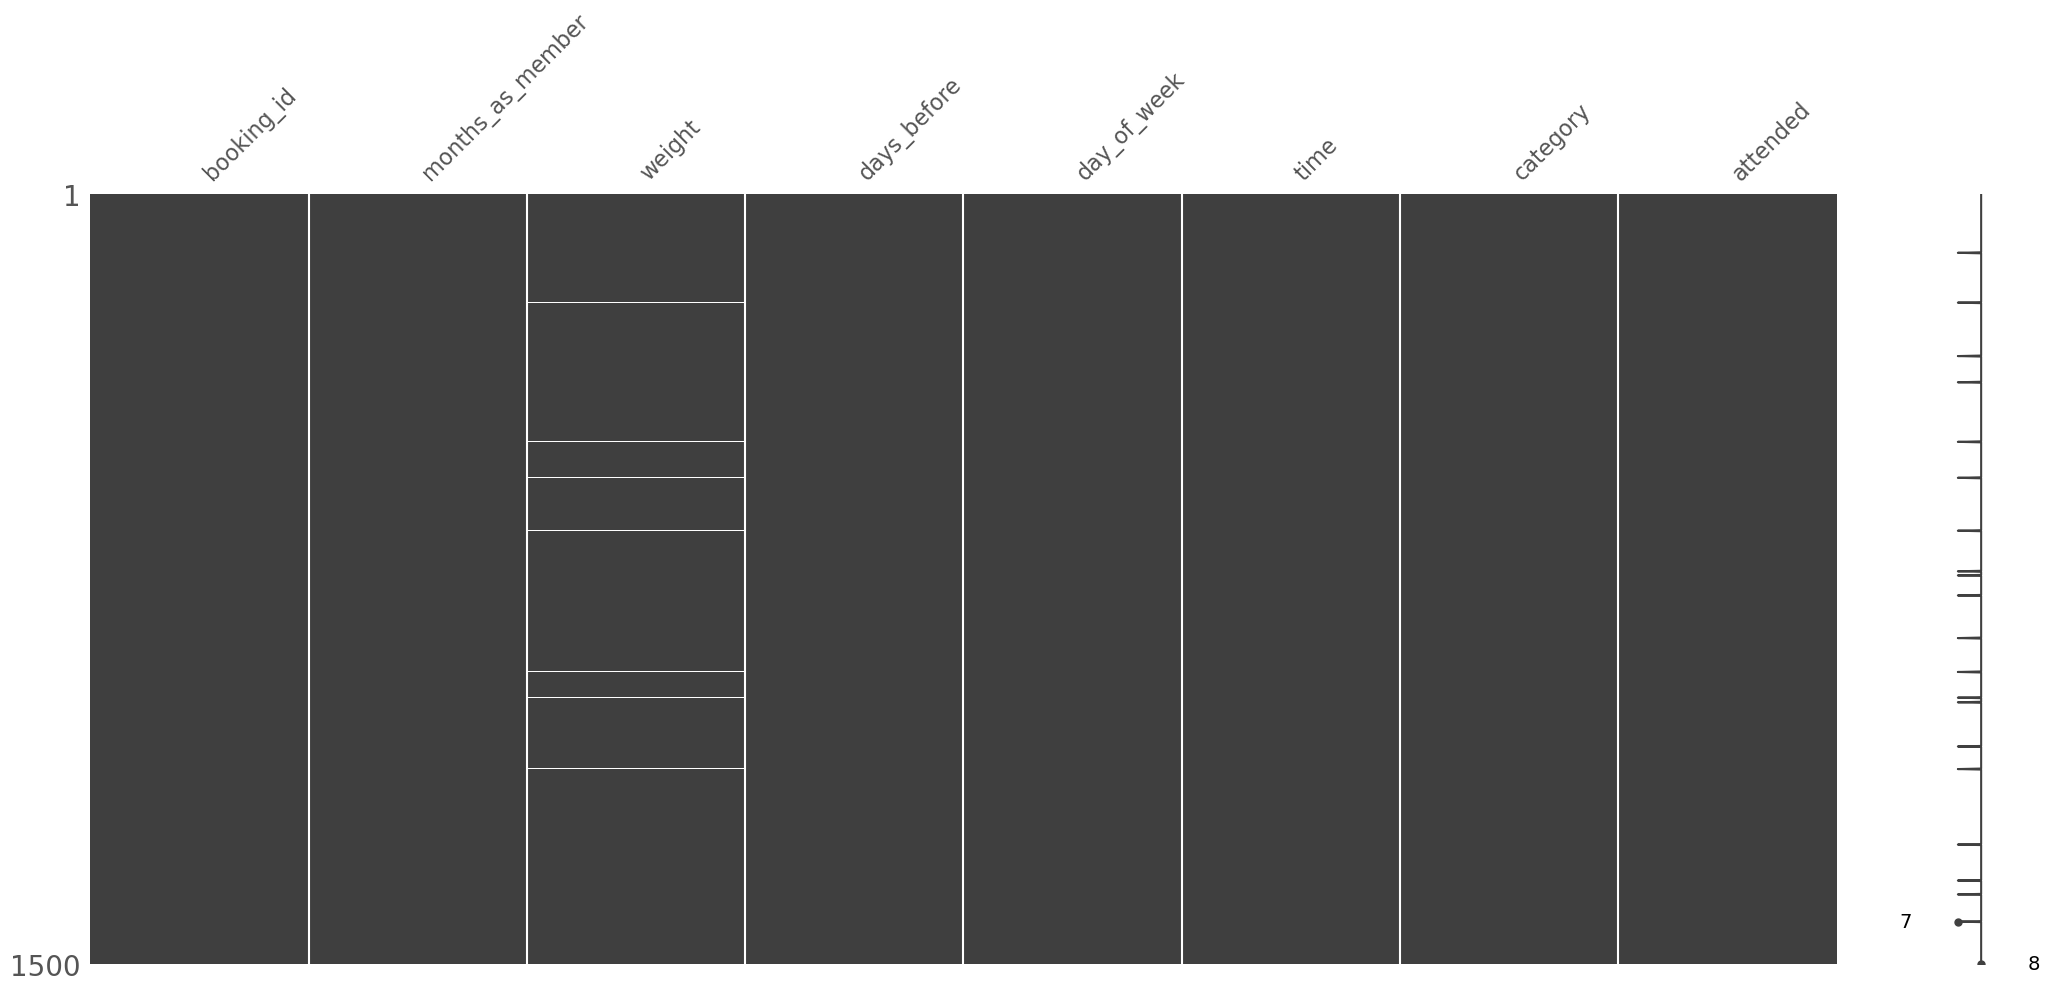

In [191]:
# check the pattern of missingness of data
import missingno as msno

msno.matrix(df)

# Data Validation and Prepocessing


In [192]:
# Select the categorical columns
cat_vars = df.select_dtypes(include = ['category', 'object']).columns.tolist()
print(cat_vars)

['days_before', 'day_of_week', 'time', 'category']


In [193]:
# Loop through all the categorical column 
for column in cat_vars:
    print(df[column].value_counts())

10         293
2          199
8          194
12         178
14         172
4          154
6           70
7           38
3           31
5           30
11          26
13          25
15          24
9           24
1            9
10 days      6
14 days      3
12 days      3
6 days       3
4 days       3
16           3
17           3
20           1
2 days       1
5 days       1
7 days       1
8 days       1
1 days       1
3 days       1
13 days      1
29           1
Name: days_before, dtype: int64
Fri          279
Thu          241
Mon          218
Sun          213
Sat          202
Tue          195
Wed           81
Wednesday     35
Fri.          26
Monday        10
Name: day_of_week, dtype: int64
AM    1141
PM     359
Name: time, dtype: int64
HIIT        667
Cycling     376
Strength    233
Yoga        135
Aqua         76
-            13
Name: category, dtype: int64


In [194]:
# Select the numerical columns
num_vars = df.select_dtypes(include = ['int64', 'float64']).columns.tolist()
print(num_vars)

['booking_id', 'months_as_member', 'weight', 'attended']


In [195]:
# Loop through all the numerical column 
for column in num_vars:
    print(df[column].value_counts())

1       1
998     1
1007    1
1006    1
1005    1
       ..
498     1
497     1
496     1
495     1
1500    1
Name: booking_id, Length: 1500, dtype: int64
8      99
7      93
6      92
9      85
5      80
       ..
60      1
90      1
105     1
62      1
69      1
Name: months_as_member, Length: 72, dtype: int64
78.28    5
84.64    4
75.63    4
76.18    3
69.00    3
        ..
65.01    1
73.09    1
86.22    1
79.44    1
94.39    1
Name: weight, Length: 1241, dtype: int64
0    1046
1     454
Name: attended, dtype: int64


In [196]:
# Remove 'days' from 'days_before' column
df['days_before'] = df['days_before'].str.replace(' days', '')

# Replace '-' in category column with 'uknown'
df['category'] = df['category'].str.replace('-', 'unknown')

# Replace 'day_of_week' values with abbreviated versions
df['day_of_week'] = df['day_of_week'].str.replace('Wednesday', 'Wed')
df['day_of_week'] = df['day_of_week'].str.replace('Fri.', 'Fri')
df['day_of_week'] = df['day_of_week'].str.replace('Monday', 'Mon')

# Replace the missing values in 'weight' column with the overall mean
avg_weight = df['weight'].mean().round(2)
df['weight'].fillna(avg_weight, inplace=True)

# check if there is still missing values in 'weight' column
df['weight'].isnull().sum()


C:\Users\USER\AppData\Local\Temp\ipykernel_8548\803509325.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  df['day_of_week'] = df['day_of_week'].str.replace('Fri.', 'Fri')


0

In [197]:
# Value counts for all columns
df.value_counts()


booking_id  months_as_member  weight  days_before  day_of_week  time  category  attended
1           17                79.56   8            Wed          PM    Strength  0           1
998         11                94.38   4            Tue          PM    HIIT      0           1
1007        4                 97.91   8            Thu          AM    Aqua      0           1
1006        6                 98.25   4            Tue          AM    Cycling   0           1
1005        14                95.60   14           Sun          AM    HIIT      1           1
                                                                                           ..
498         7                 77.92   8            Thu          AM    Cycling   0           1
497         7                 77.96   2            Mon          AM    HIIT      0           1
496         10                89.19   8            Thu          AM    Cycling   0           1
495         4                 89.38   11           Fri          A

In [198]:
# Summary statistics of data
df.describe().astype('int64')

,booking_id,months_as_member,weight,attended
count,1500,1500,1500,1500
mean,750,15,82,0
std,433,12,12,0
min,1,1,55,0
25%,375,8,73,0
50%,750,12,81,0
75%,1125,19,89,1
max,1500,148,170,1


**The table provides statistical information for four variables: booking_id, months_as_member, weight, and attended. Here is a summary of the statistics:**

- booking_id: The dataset contains 1500 booking IDs. The minimum booking ID is 1, and the maximum booking ID is 1500.
- months_as_member: The average number of months as a member is approximately 15, with a standard deviation of 12. The minimum value is 1, and the maximum value is 148.
- weight: The average weight is approximately 82, with a standard deviation of 12. The minimum weight is 55, and the maximum weight is 170.
- attended: This variable represents whether the booking was attended or not. The dataset consists of 1500 entries, with a mean of 0 (indicating not attended). The variable has a minimum value of 0 and a maximum value of 1.

These statistics provide insights into the distribution and characteristics of the variables in the dataset.

## EXploratory Data Analysis
- Univariate Analyis 
- Bivariate Analyis 
- Multivariate Analysis

Univariate Analysis

- We will consider the each of the features and its visualization to check the distribution 

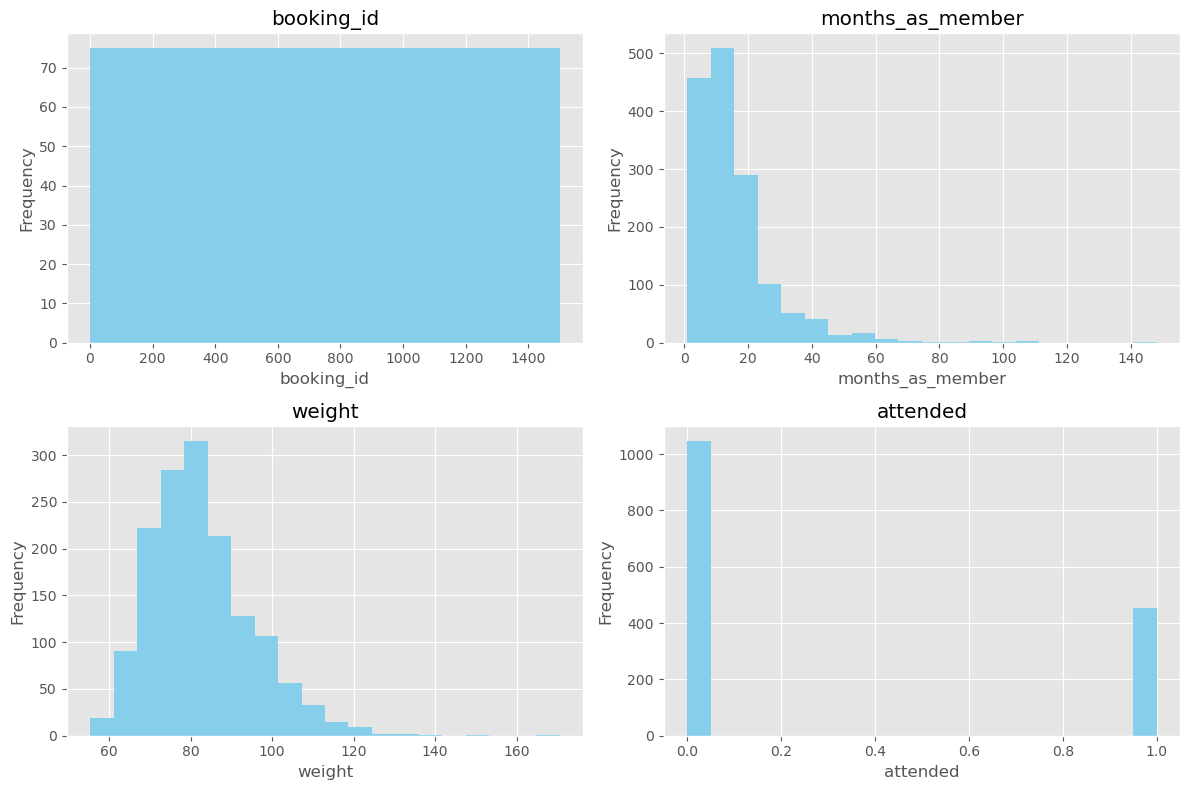

In [199]:
# Select the numerical columns for the subplot
numerical_columns = ['booking_id', 'months_as_member', 'weight', 'attended']

# Define the number of rows and columns for the subplot
num_rows = 2
num_cols = 2

# Create a subplot
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))

# Flatten the 2D axes array for easier indexing
axes = axes.flatten()

# Loop through the numerical columns and plot them
for i, col in enumerate(numerical_columns):
    ax = axes[i]
    ax.hist(df[col], bins=20, color='skyblue')
    ax.set_title(col)
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

*The number of bookings in the fitness class platform is 1500. The "month_as_member" variable is skewed to the right, indicating that the majority of the members have been with the platform for at least 15 months. In terms of the "weight" column, the majority of members weigh 82 pounds and above. However, there are only two members who weigh between 140 and 170 pounds, respectively. Additionally, there are more people who do not attend the fitness classes compared to those who do attend.*

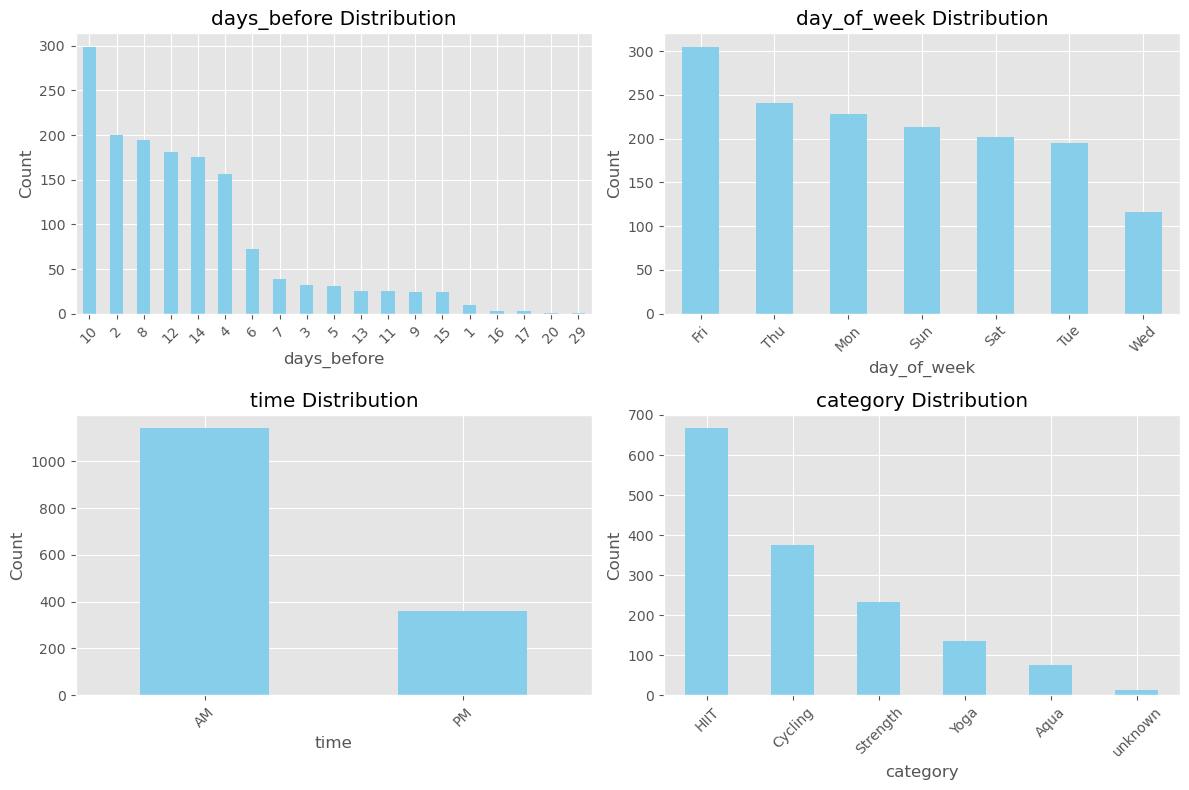

In [200]:
# Select the categorical columns for the subplot
categorical_columns = ['days_before', 'day_of_week', 'time', 'category']

# Define the number of rows and columns for the subplot
num_rows = 2
num_cols = 2

# Create a subplot
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))

# Flatten the 2D axes array for easier indexing
axes = axes.flatten()

# Loop through the categorical columns and plot them
for i, col in enumerate(categorical_columns):
    ax = axes[i]
    value_counts = df[col].value_counts()
    value_counts.plot(kind='bar', ax=ax, color='skyblue')
    ax.set_title(f'{col} Distribution')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')
    
    # Rotate x-axis labels
    ax.tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

**Here are some insights:**

**Days Before Distribution:**

The highest frequency of events or actions occurs roughly 10 days before a particular date or deadline.
The frequency then decreases gradually as we approach the said date or deadline.
Very few events occur close to the day of interest, with a notable dip around the 20-25 day range.

**Day of the Week Distribution:**

Friday appears to be the most popular or busiest day, with the highest count.
Wednesday has the least number of events or actions among the days of the week.
The activity level seems to be relatively consistent from Thursday to Tuesday, with slight variations.


**Time Distribution:**

A vast majority of events or actions happen during the AM (morning) hours.
The frequency in the PM (afternoon/evening) is significantly less than that of the AM.


**Category Distribution:**

HIIT (High-Intensity Interval Training) is the most popular category, with the highest count.
Yoga and Aqua have relatively low counts, indicating they might be less popular or less frequently conducted.
There's a category labeled 'Unknown' which suggests that some data points don't have a clear category associated with them or it wasn't recorded.
In summary, it appears that most events or actions are concentrated around 10 days before a certain date, mostly happen on Fridays and in the mornings, and HIIT sessions are the most popular category.






In [201]:
df.head(5)


,booking_id,months_as_member,weight,days_before,day_of_week,time,category,attended
0,1,17,79.56,8,Wed,PM,Strength,0
1,2,10,79.01,2,Mon,AM,HIIT,0
2,3,16,74.53,14,Sun,AM,Strength,0
3,4,5,86.12,10,Fri,AM,Cycling,0
4,5,15,69.29,8,Thu,AM,HIIT,0


# **Bivariate Analysis**

In [202]:
attendance_by_category = df.groupby('category')['attended'].sum()

print(attendance_by_category)


category
Aqua         25
Cycling     110
HIIT        213
Strength     62
Yoga         42
unknown       2
Name: attended, dtype: int64


In [203]:
category_attendance_counts = df.groupby(['category', 'attended']).count()['booking_id']

print(category_attendance_counts)

category  attended
Aqua      0            51
          1            25
Cycling   0           266
          1           110
HIIT      0           454
          1           213
Strength  0           171
          1            62
Yoga      0            93
          1            42
unknown   0            11
          1             2
Name: booking_id, dtype: int64


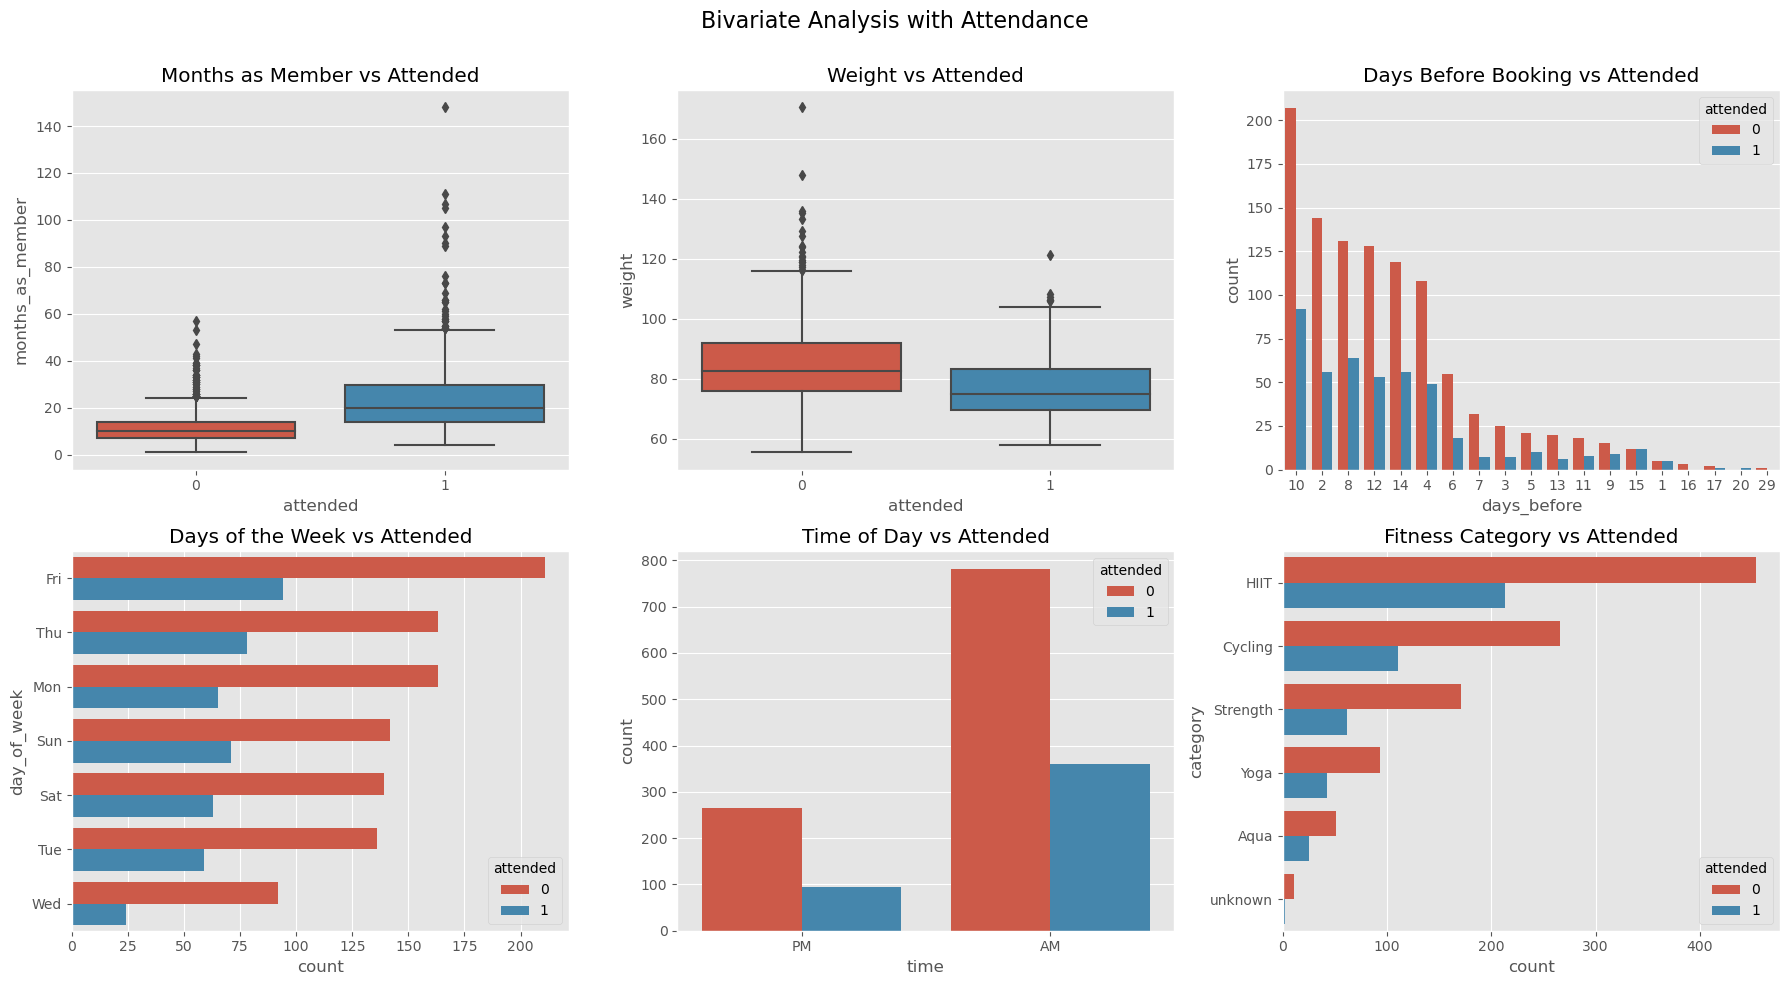

In [204]:
# Set up the figure and axes
fig, ax = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Bivariate Analysis with Attendance', fontsize=16)

# Plotting months_as_member vs attended
sns.boxplot(x=df['attended'], y=df['months_as_member'], ax=ax[0, 0])
ax[0, 0].set_title('Months as Member vs Attended')

# Plotting weight vs attended
sns.boxplot(x=df['attended'], y=df['weight'].dropna(), ax=ax[0, 1])
ax[0, 1].set_title('Weight vs Attended')

# Plotting days_before vs attended
sns.countplot(x=df['days_before'], hue=df['attended'], order=df['days_before'].value_counts().index, ax=ax[0, 2])
ax[0, 2].set_title('Days Before Booking vs Attended')

# Plotting day_of_week vs attended
sns.countplot(y=df['day_of_week'], hue=df['attended'], order=df['day_of_week'].value_counts().index, ax=ax[1, 0])
ax[1, 0].set_title('Days of the Week vs Attended')

# Plotting time vs attended
sns.countplot(x=df['time'], hue=df['attended'], ax=ax[1, 1])
ax[1, 1].set_title('Time of Day vs Attended')

# Plotting category vs attended
sns.countplot(y=df['category'], hue=df['attended'], order=df['category'].value_counts().index, ax=ax[1, 2])
ax[1, 2].set_title('Fitness Category vs Attended')

# Adjusting layout
plt.tight_layout()
fig.subplots_adjust(top=0.90)

# Show the plot
plt.show()


**Months as Member vs Attended:**

Members who have been around longer (higher months) tend to attend more often.
Newer members (lower months) have a wider spread in attendance.

**Weight vs Attended:**
The median weight of attendees and non-attendees is quite similar.
There isn't a very distinct pattern between weight and attendance.

**Days Before Booking vs Attended:**
Members who book 7 or 14 days in advance seem to have a higher rate of non-attendance.
Members who book 1 day in advance tend to attend more often.

**Days of the Week vs Attended:**
Attendance seems lower on Wednesdays and higher on Thurdays and Fridays.
Sunday, being the least popular day for bookings, also has a low attendance rate.

**Time of Day vs Attended:**
AM classes have a higher attendance rate compared to PM classes.

**Fitness Category vs Attended:**

The "HIIT" category has a higher rate of attendance.
"HIIT" and "Cycling" classes have more non-attendees compared to attendees.

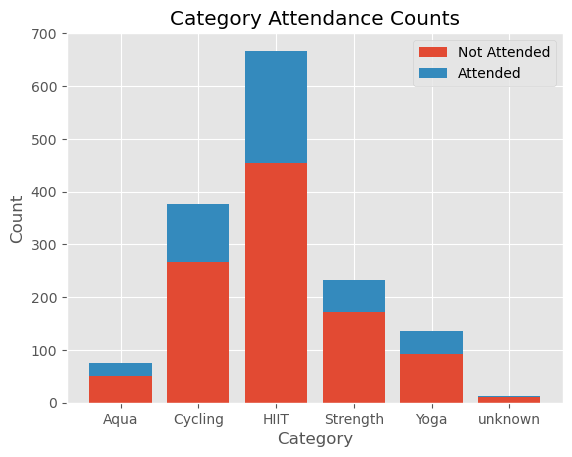

In [205]:
category_attendance_counts = df.groupby(['category', 'attended']).count()['booking_id']

# Reshape the data for plotting
data = category_attendance_counts.unstack()
categories = data.index
attendance = [data[0], data[1]]
plt.bar(categories, attendance[0], label='Not Attended')
plt.bar(categories, attendance[1], bottom=attendance[0], label='Attended')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Category Attendance Counts')
plt.legend()
plt.show()


Popularity by Category:

HIIT (High-Intensity Interval Training) has the highest overall attendance. This suggests that it is the most popular category among the members.
Aqua and Cycling have relatively lower attendance compared to the other categories, indicating that they might be less popular or perhaps offered less frequently.
Attendance vs Non-Attendance:

HIIT not only has the highest attendance but also has a significant number of members who didn't attend. This could mean that while HIIT is popular, it might also be intimidating or not suitable for everyone.
Strength and Yoga classes have a more balanced ratio between those who attended and those who did not.
Aqua and Cycling show a more noticeable gap with higher non-attendance rates compared to their attendance rates. This might imply that these categories are not as appealing to the broader membership or are niche in nature.
The unknown category has relatively equal attendance and non-attendance counts, which is intriguing. This might represent classes or sessions that members are unsure about or haven't been properly categorized.
General Attendance Trend:

The majority of categories, except for Aqua and Cycling, have higher non-attendance counts than attendance counts. This could indicate various factors like scheduling conflicts, class difficulty, or general member preferences affecting attendance.
Potential Areas of Improvement:

Given the high non-attendance rates for certain categories, it might be worthwhile for the organization to consider gathering feedback to understand member preferences better and adapt the class offerings accordingly.
In summary, while HIIT seems to be the most popular category among members, there are still significant non-attendance rates across all categories. Engaging with members to understand their needs and preferences might provide valuable insights to enhance attendance rates and overall member satisfaction.




In [206]:
correlation = df['weight'].corr(df['attended'])

print(f"Correlation between weight and attendance: {correlation}")

Correlation between weight and attendance: -0.2835213591433109


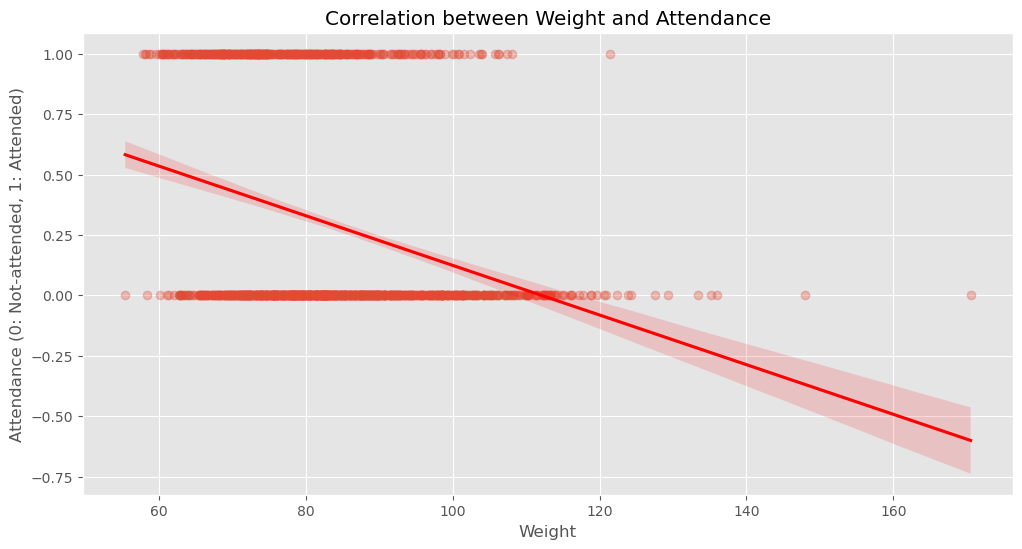

In [207]:
# Scatter plot with regression line for weight vs attendance
plt.figure(figsize=(12, 6))
sns.regplot(x=df['weight'], y=df['attended'], scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('Correlation between Weight and Attendance')
plt.xlabel('Weight')
plt.ylabel('Attendance (0: Not-attended, 1: Attended)')
plt.show()


The scatter plot above visually represents the relationship between a member's weight and their attendance to fitness classes. The regression line, drawn in red, showcases a downward trend, confirming the negative correlation value of 
−0.2835

A negative correlation suggests that as one variable increases, the other tends to decrease. In this context, as the weight of the members increases, their likelihood of attending the class decreases.

# **Label Encoding**

Convert the categorical column to numerical

In [208]:
from sklearn.preprocessing import LabelEncoder

convert_columns = ['day_of_week', 'time', 'category']

# Create a LabelEncoder object
le = LabelEncoder()

# Apply LabelEncoder to each column
for column in convert_columns:
    df[column] = le.fit_transform(df[column])

# Print the first two rows of the transformed columns
print(df[convert_columns].head(2))

   day_of_week  time  category
0            6     1         3
1            1     0         2


In [209]:
df.head()

,booking_id,months_as_member,weight,days_before,day_of_week,time,category,attended
0,1,17,79.56,8,6,1,3,0
1,2,10,79.01,2,1,0,2,0
2,3,16,74.53,14,3,0,3,0
3,4,5,86.12,10,0,0,1,0
4,5,15,69.29,8,4,0,2,0


# **Feature Selection**

In [210]:
# select the target variable y
y = df['attended']

# drop the target variable and create the independent variable X
X = df.drop('attended', axis = 1)

In [211]:
# check the head of y and X
print(y.head())
print('......................................................................................................')
print(X.head())

0    0
1    0
2    0
3    0
4    0
Name: attended, dtype: int64
......................................................................................................
   booking_id  months_as_member  weight days_before  day_of_week  time  \
0           1                17   79.56           8            6     1   
1           2                10   79.01           2            1     0   
2           3                16   74.53          14            3     0   
3           4                 5   86.12          10            0     0   
4           5                15   69.29           8            4     0   

   category  
0         3  
1         2  
2         3  
3         1  
4         2  


# **Oversampling Using SMOTE**
SMOTE creates sythetic samples by interpolating between te neighbouring instances of the minority class

In [212]:
# showing the imbalance of 'attended' class
y.value_counts()

0    1046
1     454
Name: attended, dtype: int64

In [213]:
pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [214]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Instantiate SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Resample the data
X_resampled, y_resampled = smote.fit_resample(X, y)

# Print the class distribution before and after resampling
print('Class distribution before resampling: {}'.format(Counter(y)))
print('Class distribution after resampling: {}'.format(Counter(y_resampled)))

Class distribution before resampling: Counter({0: 1046, 1: 454})
Class distribution after resampling: Counter({0: 1046, 1: 1046})


## Train-Test-Split
We are splitting the X and y into training set and testing using 70-30 ratio.

In [215]:
from sklearn.model_selection import train_test_split

# Split the data into training amd testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

print('\n', X_train.head(2))
print('\n', X_test.head(2))
print('\n', y_train.head(2))
print('\n', y_test.head(2))


       booking_id  months_as_member     weight days_before  day_of_week  time  \
1521         307                14  90.958649    7.789901            1     0   
1431        1432                 6  82.570000         2.0            1     0   

      category  
1521         1  
1431         1  

       booking_id  months_as_member  weight days_before  day_of_week  time  \
1280        1281                 7  102.60        12.0            2     0   
29            30                27   98.91        12.0            2     0   

      category  
1280         2  
29           4  

 1521    1
1431    0
Name: attended, dtype: int64

 1280    0
29      1
Name: attended, dtype: int64


In [216]:
print('\n The Shape of X_train', X_train.shape)
print('\n The Shape of X_test', X_test.shape)
print('\n The Shape of y_train', y_train.shape)
print('\n The Shape of y_test', y_test.shape)


 The Shape of X_train (1464, 7)

 The Shape of X_test (628, 7)

 The Shape of y_train (1464,)

 The Shape of y_test (628,)


## Data Scaling (Standardization)
It is also called data standardization: it is a preprocessing step towards transforming the features of the data to have a similar scale. It is important because machine learning algorithms perform better or converge faster when the features are on a similar scale.

**Methods of Scaling:**
- Min-Max Scaling
- Standard Scaler.

In [217]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform X_train
X_train_scaled = scaler.fit_transform(X_train)

# Transform X_test using the same scaler
X_test_scaled = scaler.transform(X_test)

## Model Selection
- Logistic Regression
- Decision Tree Classifier
- Random Forest Classifier


In [218]:
# import the algorithms for the model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# for model evaluation metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn import metrics

# for hyperparameter tuning
from sklearn.model_selection import cross_val_score, cross_val_predict

## **Logistic_Regression**

In [221]:
lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train)

LogisticRegression()

## **Decision_Tree_Classifier**

In [222]:
dc_model = DecisionTreeClassifier()
dc_model.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

## **Random_Forest_Classifier**

In [223]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier()

Logistic Regression Classification Report: 
              precision    recall  f1-score   support

Not-Attended      0.693     0.781     0.734       301
    Attended      0.772     0.682     0.724       327

    accuracy                          0.729       628
   macro avg      0.732     0.731     0.729       628
weighted avg      0.734     0.729     0.729       628



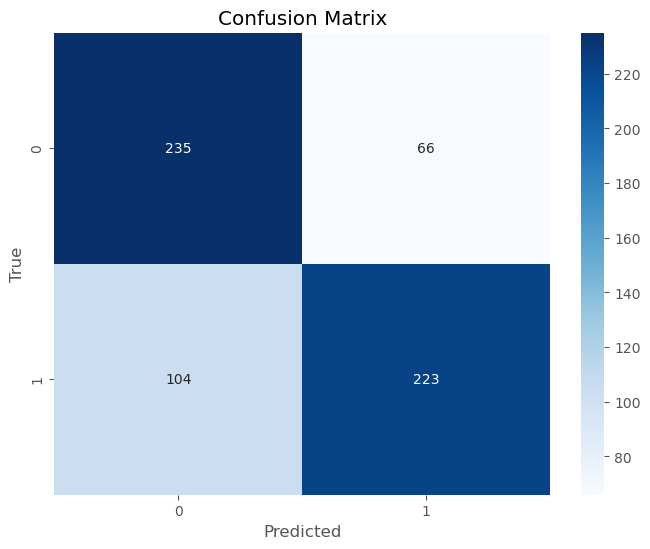

Decision Tree Classification Report: 
              precision    recall  f1-score   support

Not-Attended      0.712     0.738     0.724       301
    Attended      0.750     0.725     0.737       327

    accuracy                          0.731       628
   macro avg      0.731     0.731     0.731       628
weighted avg      0.732     0.731     0.731       628



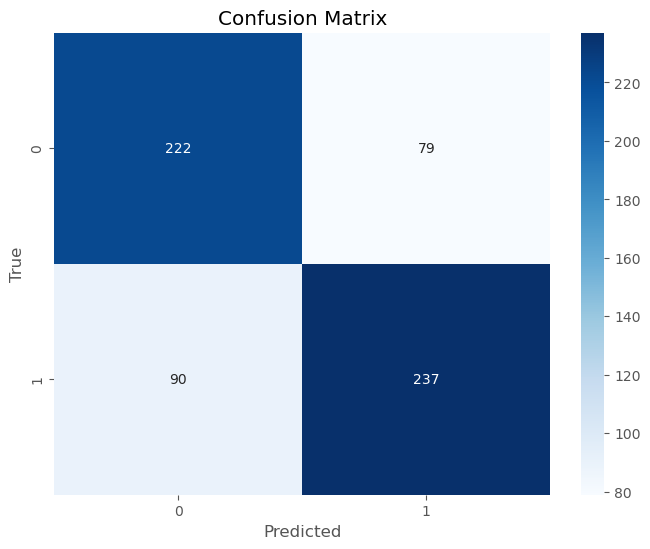

Random Forest Classification Report: 
              precision    recall  f1-score   support

Not-Attended      0.782     0.811     0.796       301
    Attended      0.820     0.792     0.806       327

    accuracy                          0.801       628
   macro avg      0.801     0.801     0.801       628
weighted avg      0.802     0.801     0.801       628



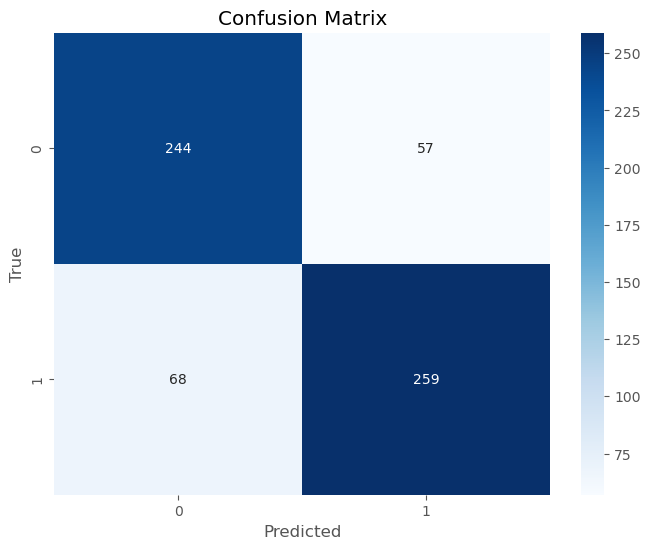

In [226]:
from sklearn.metrics import classification_report, confusion_matrix

# Assuming models are defined and trained elsewhere in your script
models = [lr_model, dc_model, rf_model]
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest']
labels = ['Not-Attended', 'Attended']

def plot_confusion_matrix(y_test, y_pred, labels, title='Confusion Matrix'):
    cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(title)
    plt.show()

for i, model in enumerate(models):
    y_pred = model.predict(X_test_scaled)  # Ensure X_test_scaled is correctly processed
    report = classification_report(y_test, y_pred, target_names=labels, digits=3)
    print(f'{model_names[i]} Classification Report: \n{report}')
     # plot the confusion matrix
    plot_confusion_matrix(y_test, y_pred, labels=[0, 1])
